In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bddatagdp/bangladesh-gdp.csv


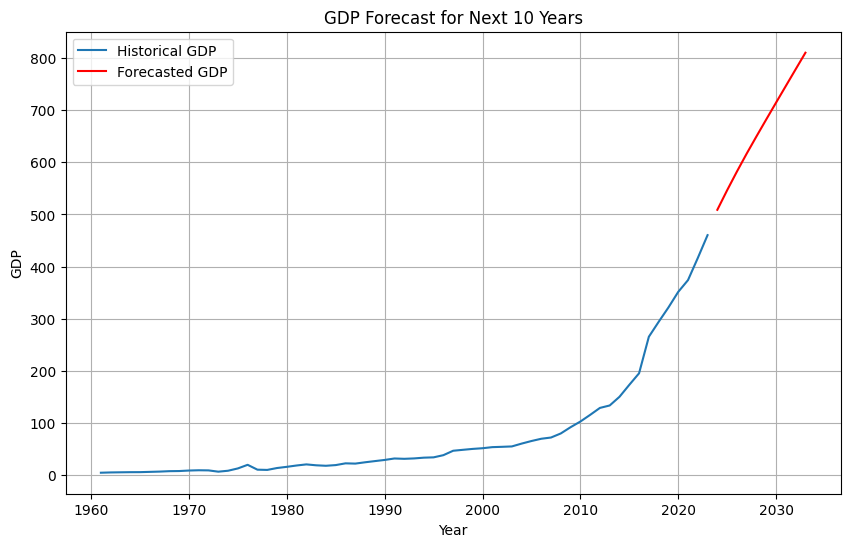

In [2]:
from statsmodels.tsa.vector_ar.vecm import VECM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Load the dataset
file_path = '/kaggle/input/bddatagdp/bangladesh-gdp.csv'  # Replace with your file path
data = pd.read_csv(file_path)


# Dropping the unnecessary column 'PGGFCE' and filling missing values
data.drop(columns=['General government final consumption expenditure'], inplace=True)

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

# Normalizing the data
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)

# Preparing the VECM model
vecm_model = VECM(data_scaled, coint_rank=2, freq='A')  # Setting frequency as annual
vecm_fit = vecm_model.fit()

# Forecasting for the next 10 years
n_forecast = 10
forecast = vecm_fit.predict(n_forecast)

# Inverting the scaling to get actual values
forecast_real = scaler.inverse_transform(forecast)

# Extracting the forecasted GDP values
forecasted_gdp = forecast_real[:, 0]  # 'GDP_BD' is assumed to be the first column

# Ensuring the forecasted GDP is greater than the 2022 GDP value
last_known_gdp = data['GDP_BD'].iloc[-1]
forecasted_gdp = np.maximum(forecasted_gdp, last_known_gdp)

# Creating a date range for the forecasted data
last_date = data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=n_forecast + 1, freq='A')[1:]

# Visualizing the forecast with historical data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['GDP_BD'], label='Historical GDP')
plt.plot(forecast_dates, forecasted_gdp, label='Forecasted GDP', color='red')
plt.title('GDP Forecast for Next 10 Years')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
from statsmodels.tsa.vector_ar.vecm import VECM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import VECM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Load the dataset
file_path = '/kaggle/input/bddatagdp/bangladesh-gdp.csv'  # Replace with your file path
data = pd.read_csv(file_path)


# Dropping the unnecessary column 'PGGFCE' and filling missing values
data.drop(columns=['General government final consumption expenditure'], inplace=True)

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

# Normalizing the data
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)

# Load the normalized dataset

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Here it's assumed to be 2 as per your previous input
vecm_model = VECM(train, coint_rank=2, freq='Y')
vecm_fit = vecm_model.fit()

# Forecasting on the test set
n_obs = len(test)
forecast = vecm_fit.predict(n_obs)

# Extracting the forecasted 'GDP_BD' values
# Ensure you have the column 'GDP_BD' in your DataFrame after preprocessing
forecast_gdp_bd = forecast[:, data_scaled.columns.get_loc('GDP_BD')]
actual_gdp_bd = test['GDP_BD'].values

# Calculate performance metrics
mse = mean_squared_error(actual_gdp_bd, forecast_gdp_bd)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_gdp_bd, forecast_gdp_bd)
r2 = r2_score(actual_gdp_bd, forecast_gdp_bd)

performance_metrics = {
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2
}

print(performance_metrics)


{'Mean Squared Error': 0.006551565770969321, 'Root Mean Squared Error': 0.08094174306851391, 'Mean Absolute Error': 0.05787230376757909, 'R-squared': 0.895163983186023}


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming vecm_fit is your fitted VECM model
# Assuming data is your historical GDP data

# Get the predicted values from the model fit
predicted_values = vecm_fit.predict(len(data))

# Extract the predicted GDP values
predicted_gdp = predicted_values[:, 1]  

# Get the actual GDP values from the data
actual_gdp = data['GDP_BD'].values

# Calculate R-squared
r_squared = r2_score(actual_gdp, predicted_gdp)
print(f"R-squared value: {r_squared}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_gdp, predicted_gdp)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_gdp, predicted_gdp)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate Forecast Bias
bias = np.mean(predicted_gdp - actual_gdp)
print(f"Forecast Bias: {bias}")


R-squared value: -0.43358075014242003
Mean Squared Error (MSE): 16958.94295579648
Mean Absolute Error (MAE): 73.45917173685979
Root Mean Squared Error (RMSE): 130.22650634873256
Forecast Bias: -73.45917173685979


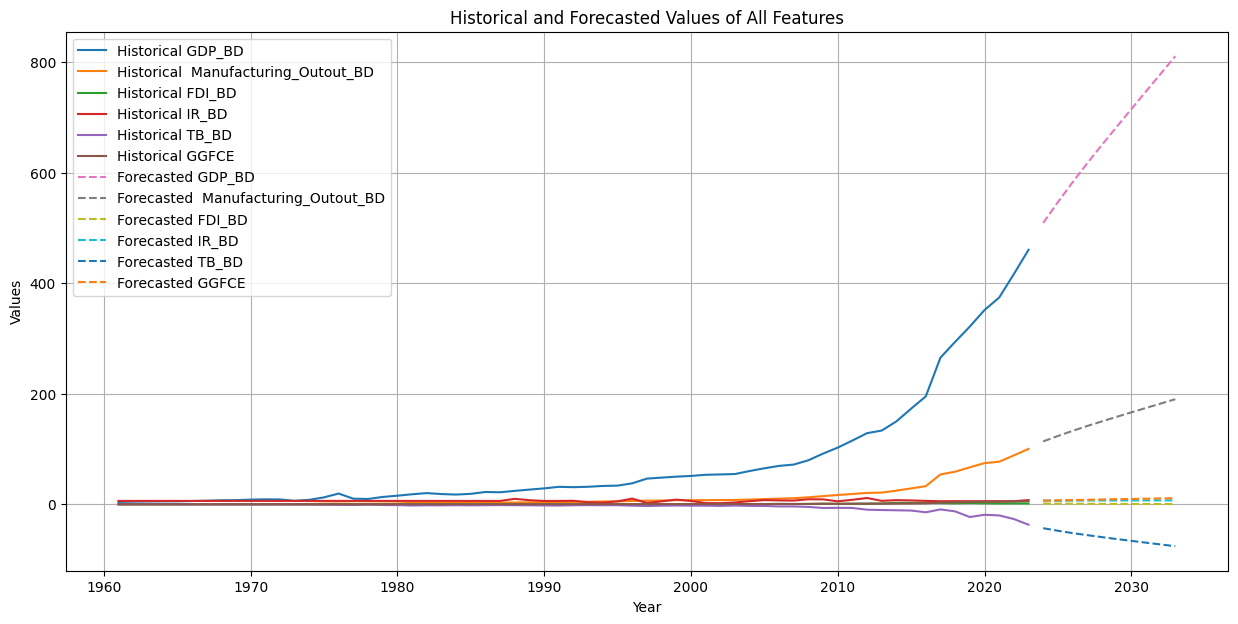

In [22]:
# Visualizing all features (both historical and forecasted) in a single graph

plt.figure(figsize=(15, 7))

# Plotting historical data
for column in data.columns:
    plt.plot(data.index, data[column], label=f'Historical {column}')

# Plotting forecasted data
for i, column in enumerate(data.columns):
    plt.plot(forecast_dates, forecast_real[:, i], label=f'Forecasted {column}', linestyle='--')

plt.title('Historical and Forecasted Values of All Features')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
file_path = '/kaggle/input/bddatagdp/bangladesh-gdp.csv'  # Replace with your file path
data = pd.read_csv(file_path)


# Dropping the unnecessary column 'PGGFCE' and filling missing values
data.drop(columns=['General government final consumption expenditure'], inplace=True)
# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())


# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
# Log-transform the GDP column to stabilize variance
data['GDP_BD_log'] = np.log(data['GDP_BD'])

# Normalizing the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Function to create a dataset for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Preparing the dataset for LSTM
time_steps = 3
# Index of 'GDP_BD' in your dataset
gdp_index = data.columns.get_loc('GDP_BD')
X, y = create_dataset(data_scaled, data_scaled[:, gdp_index], time_steps)

# Splitting the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and fit the model
model.compile(loss='mean_squared_error', optimizer='adam')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])



Epoch 1/10
3/3 [==============================] - 4s 446ms/step - loss: 0.0050 - val_loss: 0.3487
Epoch 2/10
3/3 [==============================] - 0s 21ms/step - loss: 0.0036 - val_loss: 0.2898
Epoch 3/10
3/3 [==============================] - 0s 28ms/step - loss: 0.0033 - val_loss: 0.2726
Epoch 4/10
3/3 [==============================] - 0s 20ms/step - loss: 0.0022 - val_loss: 0.2626
Epoch 5/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0018 - val_loss: 0.2426
Epoch 6/10
3/3 [==============================] - 0s 23ms/step - loss: 0.0015 - val_loss: 0.2118
Epoch 7/10
3/3 [==============================] - 0s 20ms/step - loss: 0.0011 - val_loss: 0.1708
Epoch 8/10
3/3 [==============================] - 0s 19ms/step - loss: 7.4830e-04 - val_loss: 0.1337
Epoch 9/10
3/3 [==============================] - 0s 25ms/step - loss: 5.8191e-04 - val_loss: 0.1122
Epoch 10/10
3/3 [==============================] - 0s 23ms/step - loss: 3.8060e-04 - val_loss: 0.0975


1/1 [==============================] - 0s 20ms/step


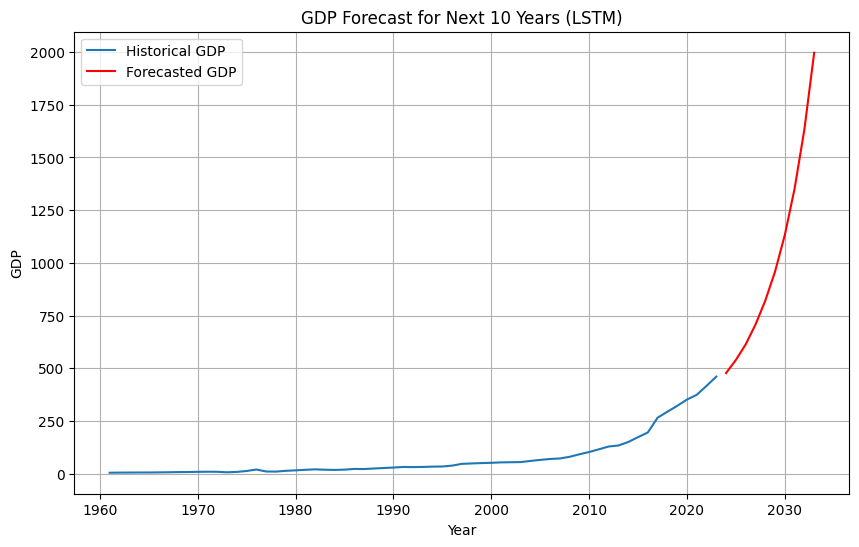

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

file_path = '/kaggle/input/bddatagdp/bangladesh-gdp.csv'  # Replace with your file path
data = pd.read_csv(file_path)


# Dropping the unnecessary column 'PGGFCE' and filling missing values
data.drop(columns=['General government final consumption expenditure'], inplace=True)
# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())


# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Log-transform the GDP column to stabilize variance
data['GDP_BD_log'] = np.log(data['GDP_BD'])

# Normalizing the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['GDP_BD_log']])  # Only scale GDP_BD_log

# Function to create a dataset for LSTM
def create_dataset(X, time_steps=1):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps), :]
        Xs.append(v)
    return np.array(Xs)

# Preparing the dataset for LSTM
time_steps = 3
X = create_dataset(data_scaled, time_steps)
y = data_scaled[time_steps:]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.1,
    verbose=0,
    shuffle=False
)

# Forecasting for the next 10 years
n_forecast = 10
forecasted_values = []
current_batch = X_test[-1:].reshape((1, time_steps, 1))

for i in range(n_forecast):
    current_pred = model.predict(current_batch)[0]
    forecasted_values.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Inverting the scaling and transformation
forecasted_values = np.array(forecasted_values).reshape(-1, 1)
forecasted_values = scaler.inverse_transform(forecasted_values)
forecasted_gdp_log = np.exp(forecasted_values)  # Reverse log transformation

# Ensure forecast is always increasing
forecasted_gdp_corrected = np.maximum.accumulate(forecasted_gdp_log)

# Creating a date range for the forecasted data
last_date = data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=n_forecast + 1, freq='A')[1:]

# Visualizing the forecast with historical data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['GDP_BD'], label='Historical GDP')
plt.plot(forecast_dates, forecasted_gdp_corrected, label='Forecasted GDP', color='red')
plt.title('GDP Forecast for Next 10 Years (LSTM)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Extracting the actual GDP values for the test set
# Note: We must reverse the log transformation and scaling for the actual values
actual_gdp_log = scaler.inverse_transform(y_test)
actual_gdp = np.exp(actual_gdp_log)

# Forecasting on the test set using the LSTM model
test_forecasted_values = []
test_current_batch = X_test[0].reshape((1, time_steps, 1))

for i in range(len(X_test)):
    test_current_pred = model.predict(test_current_batch)[0]
    test_forecasted_values.append(test_current_pred)
    # Prepare the next input batch
    if i < len(X_test) - 1:
        test_current_batch = X_test[i+1].reshape((1, time_steps, 1))

# Inverting the scaling and transformation for the forecasted values
test_forecasted_values = np.array(test_forecasted_values).reshape(-1, 1)
test_forecasted_values = scaler.inverse_transform(test_forecasted_values)
test_forecasted_gdp_log = np.exp(test_forecasted_values)

# Calculate performance metrics
mse = mean_squared_error(actual_gdp, test_forecasted_gdp_log)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_gdp, test_forecasted_gdp_log)
r2 = r2_score(actual_gdp, test_forecasted_gdp_log)

performance_metrics = {
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2
}

print(performance_metrics)



1/1 [==============================] - 0s 21ms/step
{'Mean Squared Error': 476.4914999360462, 'Root Mean Squared Error': 21.828685254408846, 'Mean Absolute Error': 16.52100378894854, 'R-squared': 0.9609041920402043}


In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# You need to predict values using the test set to calculate performance metrics
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)  # Inverse scaling
y_pred = np.exp(y_pred)  # Inverse log transformation

y_true_scaled = y_test
y_true = scaler.inverse_transform(y_true_scaled)  # Inverse scaling
y_true = np.exp(y_true)  # Inverse log transformation

# Flatten arrays since the predictions and test values are in two-dimensional arrays
y_pred = y_pred.flatten()
y_true = y_true.flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Optionally, if you're interested in model accuracy in terms of R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_true, y_pred)
print(f'Coefficient of Determination (R^2): {r2}')


1/1 [==============================] - 0s 22ms/step
Mean Squared Error (MSE): 605.8510426251363
Root Mean Squared Error (RMSE): 24.614041574376532
Mean Absolute Error (MAE): 17.213039908650774
Mean Absolute Percentage Error (MAPE): 6.90203762665704%
Coefficient of Determination (R^2): 0.950290328331369


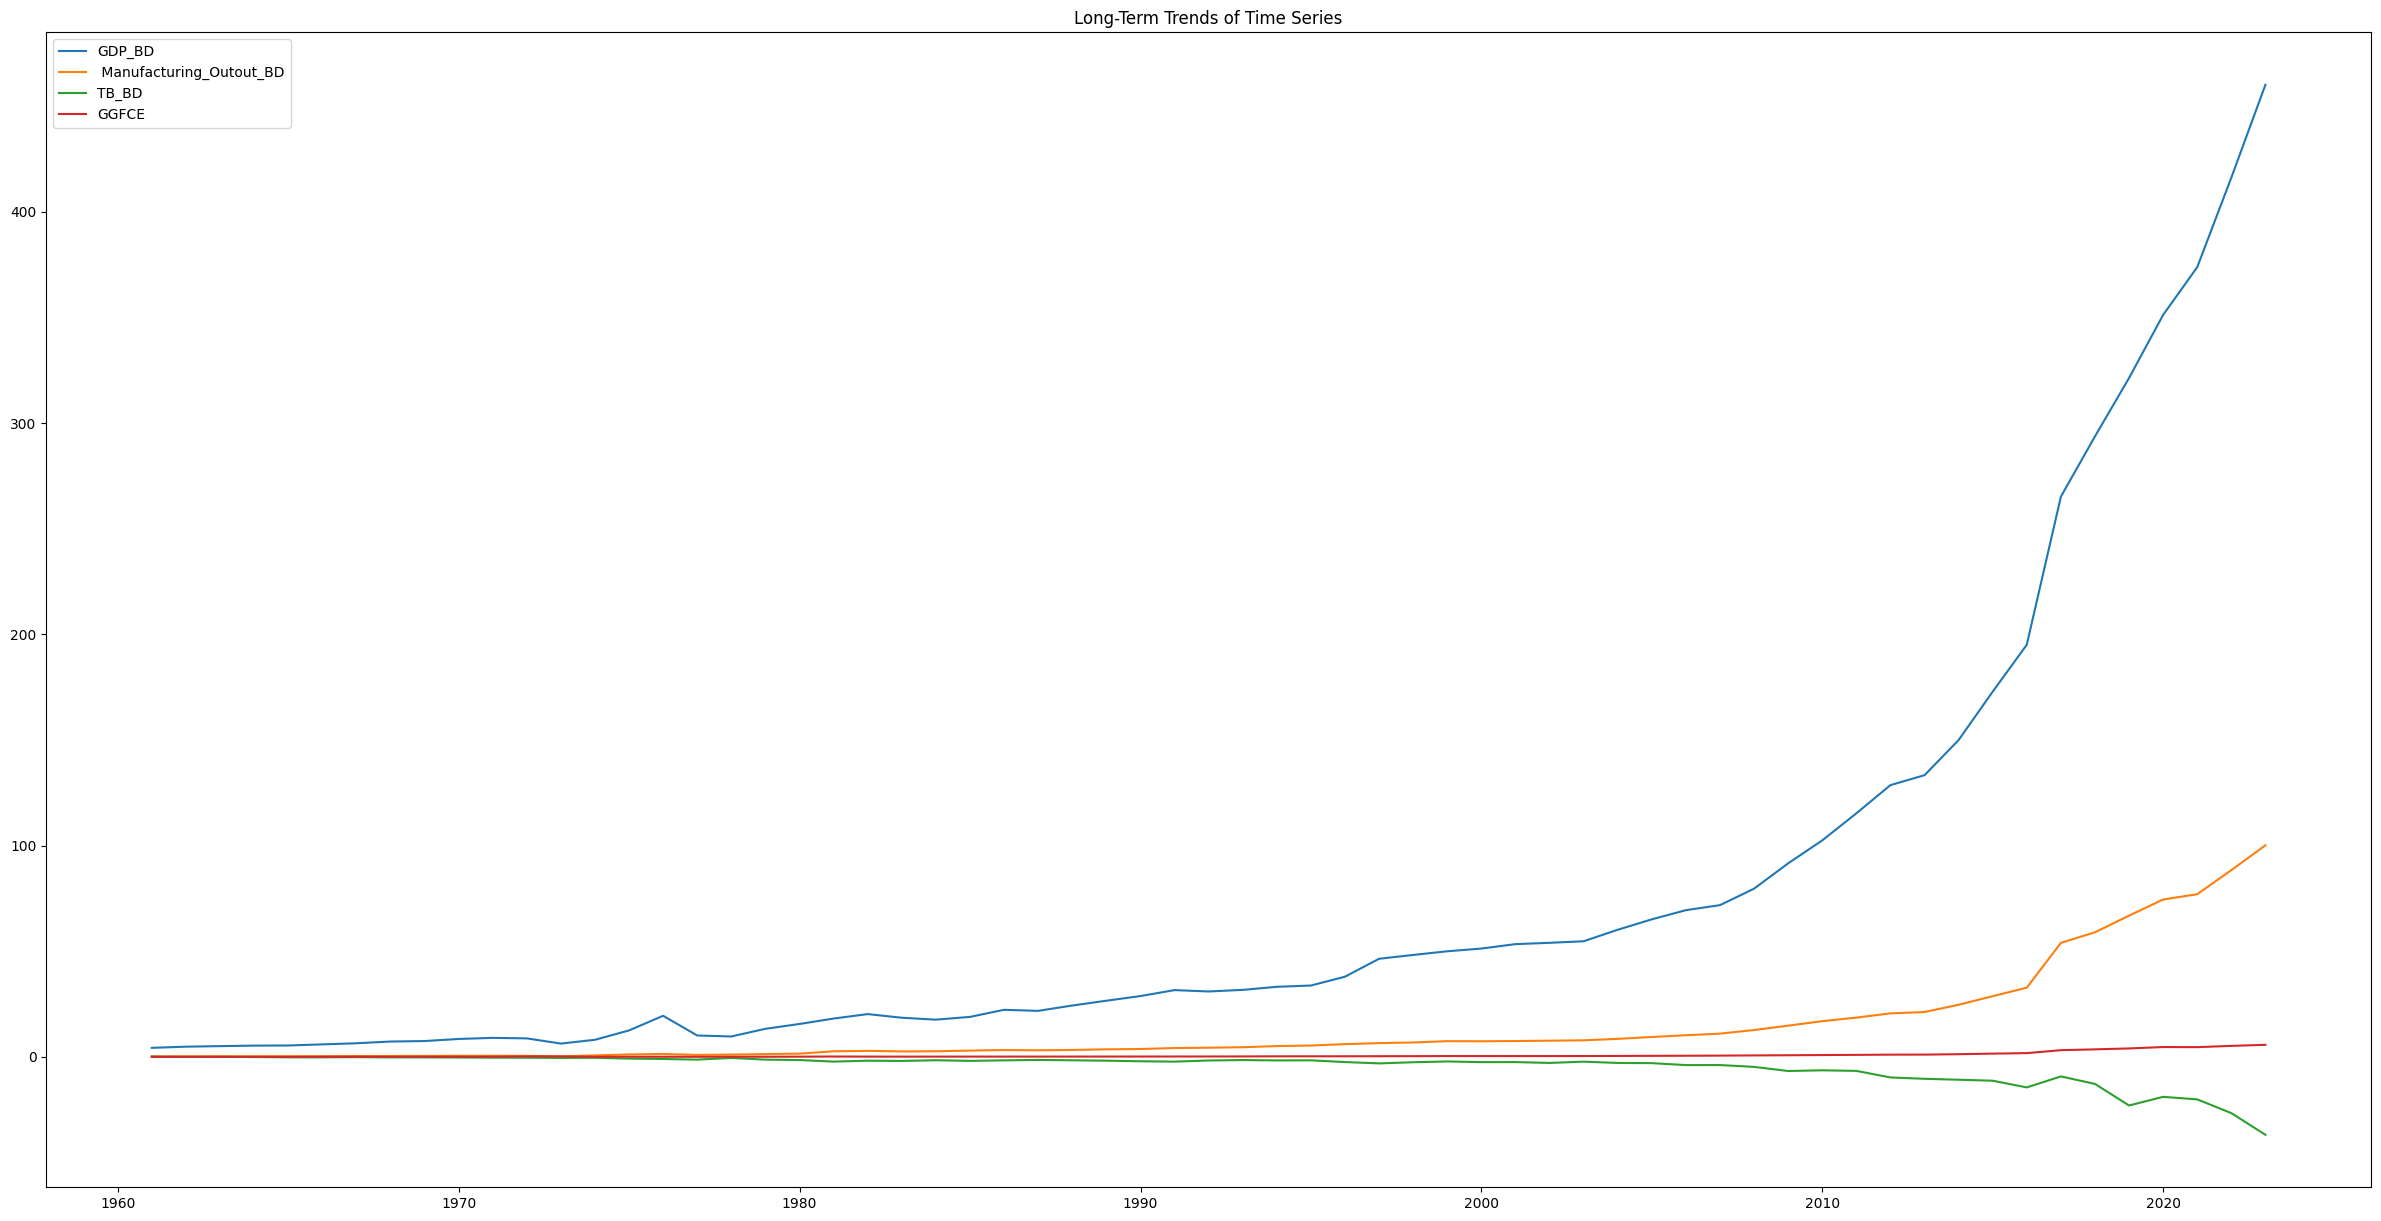

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Preprocessing: Convert 'date' to datetime if it exists and set it as index
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    data.set_index('date', inplace=True)

# Handling missing values: Replace missing values with median for this example.
numeric_columns = ['GDP_BD', ' Manufacturing_Outout_BD', 'TB_BD', 'GGFCE']


# Perform Johansen Cointegration Test
johansen_test = coint_johansen(data[numeric_columns], det_order=0, k_ar_diff=1)

# Plotting Long-Term Trends
plt.figure(figsize=(30, 15))
for column in numeric_columns:
    plt.plot(data.index, data[column], label=column)
plt.title('Long-Term Trends of Time Series')
plt.legend()
plt.show()

# Analyzing and Plotting the Residuals from the First Cointegrating Equation
# Assuming the first cointegrating relationship is the most significant
eigenvector = johansen_test.evec[:, 0]  # First eigenvector for the most significant relationship
